# Data Load

In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import time
import re

pd.set_option('display.max_columns', 200)

plt.style.use('bmh')

%matplotlib inline

In [2]:
# import the sample course dataset
course_data = pd.read_csv('dataset/Sample_data_udemy.csv')
course_data.head()

,id,course_id,rate,date,display_name,comment,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,55655710,1461260,5.0,2020-05-19T06:50:17-07:00,Emma,Excellent Course! Really interesting and very ...,The complete SOLAR ENERGY course. Beginner to ...,True,49.99,The only online course with everything you nee...,17883,4.328782,5641,1225,30,106,2018-02-01 01:01:12+00:00,2022-09-12,Teaching & Academics,Science,Solar Energy,English,/course/the-complete-solar-energy-course-begin...,Leandro Caruso,/user/f1f269ce-4255-4056-9549-f02e594ddf4e/
1,88379664,1352468,5.0,2021-06-23T03:49:44-07:00,Muralidhar,i have gone through the classes and i can unde...,Master Microservices with Spring Boot and Spri...,True,199.99,Java Spring Boot Microservices 5-in-1 - Spring...,190133,4.563948,39671,4615,316,1318,2017-09-18 23:32:14+00:00,2022-10-03,Development,Web Development,Microservices,English,/course/microservices-with-spring-boot-and-spr...,in28Minutes Official,/user/in28minutes/
2,37249292,1546612,5.0,2019-09-13T03:36:29-07:00,Ali,Great job,Build a VMware Home Lab From Scratch With this...,False,0.00,Master this step-by-step guide to create a VMw...,20910,4.458334,983,192,26,120,2018-03-01 15:21:01+00:00,2022-03-20,IT & Software,Operating Systems & Servers,VMware Vsphere,English,/course/vmware-vsphere-home-lab/,Fettah Ben,/user/fettah/
3,77875502,854440,5.0,2021-02-15T14:21:06-08:00,Rosemary,Clear and easy to follow,American English Pronunciation,True,39.99,Master basic English sounds and start speaking...,19605,4.664021,4880,663,18,174,2016-06-06 22:31:38+00:00,2021-11-10,Teaching & Academics,Language Learning,English Pronunciation,English,/course/basic-american-pronunciation/,Luke Priddy,/user/alto-ray/
4,40704690,1692094,5.0,2019-11-23T11:57:29-08:00,Nishant,"Very simple ,well designed practical python co...",Learn the Python 3 Programming Language,True,149.99,"Learn Python 3 with this interactive course, a...",48638,4.631579,560,118,52,275,2018-10-23 01:38:49+00:00,2022-03-20,Development,Programming Languages,Python,English,/course/python-3-course/,Fettah Ben,/user/fettah/


In [3]:
# show general info 
course_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334921 entries, 0 to 334920
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  334921 non-null  int64  
 1   course_id           334921 non-null  int64  
 2   rate                334921 non-null  float64
 3   date                334921 non-null  object 
 4   display_name        334921 non-null  object 
 5   comment             334921 non-null  object 
 6   title               334921 non-null  object 
 7   is_paid             334921 non-null  bool   
 8   price               334921 non-null  float64
 9   headline            334921 non-null  object 
 10  num_subscribers     334921 non-null  int64  
 11  avg_rating          334921 non-null  float64
 12  num_reviews         334921 non-null  int64  
 13  num_comments        334921 non-null  int64  
 14  num_lectures        334921 non-null  int64  
 15  content_length_min  334921 non-nul

In [4]:
# get general sense of the data 
course_data.describe()

,id,course_id,rate,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min
count,3.349210e+05,3.349210e+05,334921.000000,334921.000000,3.349210e+05,334921.000000,334921.000000,334921.000000,334921.000000,334921.000000
mean,5.374763e+07,1.439179e+06,4.496454,110.533782,1.201862e+05,4.476468,24150.874767,3560.513551,123.274999,736.212369
std,3.761049e+07,1.067890e+06,0.868900,84.116735,2.315164e+05,0.285097,55328.363684,6783.417375,154.316479,962.704581
min,2.880000e+02,2.762000e+03,0.500000,0.000000,0.000000e+00,0.500000,1.000000,1.000000,0.000000,0.000000
25%,1.914278e+07,6.556080e+05,4.000000,24.990000,6.818000e+03,4.400000,634.000000,138.000000,27.000000,137.000000
50%,5.026625e+07,1.173030e+06,5.000000,99.990000,2.981500e+04,4.545454,3685.000000,668.000000,63.000000,357.000000
75%,8.223738e+07,1.959854e+06,5.000000,199.990000,1.183680e+05,4.645503,20225.000000,3249.000000,145.000000,946.000000
max,1.267081e+08,4.910884e+06,5.000000,999.000000,1.752364e+06,5.000000,436457.000000,39040.000000,1095.000000,21353.000000


# KNN Recommender System

In [5]:
from surprise import Dataset                                                     
from surprise import Reader 
from surprise import KNNBasic, KNNWithMeans

from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse, mae

In [6]:
sample_data = course_data[['display_name', 'course_id', 'rate']]
sample_data = sample_data.rename({'display_name': 'user_name'})

In [7]:
# the model takes 3 features; id, course_id
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(sample_data, reader)

train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

In [9]:
# Number of k_neighbors for each similarity 

similarity_name = ['MSD', 'cosine', 'pearson_baseline']

k_neighbors = [3, 5, 7, 9, 11]
dict_scores = {}

for sim in similarity_name:

    sim_options = {'name' : sim, 'user_based' : False}

    rmse_basic_score = []
    mae_basic_score = []
    
    for k in k_neighbors:
        
        # KNN with means; means of rating
        knn = KNNBasic(k=k, sim_options=sim_options, verbose=True)
        knn.fit(train_data)
        
        predictions = knn.test(test_data)
        rmse_basic_score.append(rmse(predictions))
        mae_basic_score.append(mae(predictions))

    dict_scores[sim + '_rmse'] = rmse_basic_score
    dict_scores[sim + '_mae'] = mae_basic_score


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9483
MAE:  0.6383
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9303
MAE:  0.6309
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9232
MAE:  0.6278
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9194
MAE:  0.6257
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9169
MAE:  0.6244
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9534
MAE:  0.6516
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9300
MAE:  0.6411
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9203
MAE:  0.6361
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9153
MAE:  0.6335
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9122
MAE:  0.

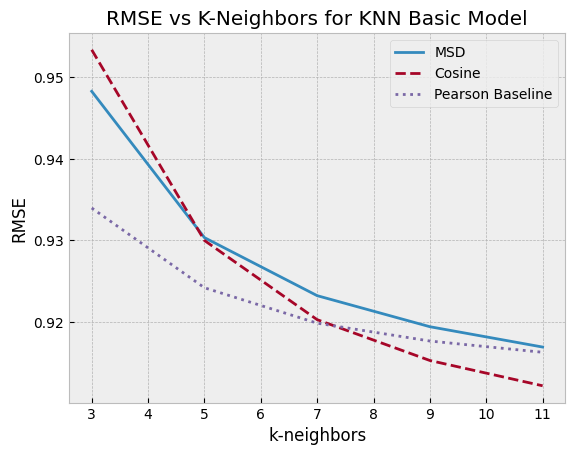

In [27]:
plt.plot(k_neighbors, dict_scores['MSD_rmse'], label = 'MSD')
plt.plot(k_neighbors, dict_scores['cosine_rmse'], label = 'Cosine', linestyle = 'dashed')
plt.plot(k_neighbors, dict_scores['pearson_baseline_rmse'], label = 'Pearson Baseline', linestyle='dotted')
plt.xlabel('k-neighbors')
plt.ylabel('RMSE')
plt.title('RMSE vs K-Neighbors for KNN Basic Model')
plt.legend()
plt.savefig('rmse_k knnbasic.png')
plt.show()

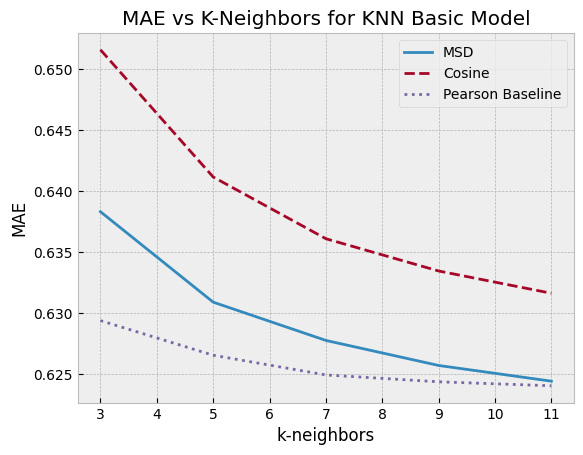

In [24]:
plt.plot(k_neighbors, dict_scores['MSD_mae'], label = 'MSD')
plt.plot(k_neighbors, dict_scores['cosine_mae'], label = 'Cosine', linestyle = 'dashed')
plt.plot(k_neighbors, dict_scores['pearson_baseline_mae'], label = 'Pearson Baseline', linestyle='dotted')
plt.xlabel('k-neighbors')
plt.ylabel('MAE')
plt.title('MAE vs K-Neighbors for KNN Basic Model')
plt.legend()
plt.savefig('mae_k knnbasic.png')
plt.show()

In [25]:
# Number of k_neighbors for each similarity 

similarity_name = ['MSD', 'cosine', 'pearson_baseline']

k_neighbors = [3, 5, 7, 9, 11]
dict_scores_means = {}

for sim in similarity_name:

    sim_options = {'name' : sim, 'user_based' : False}

    rmse_means_score = []
    mae_means_score = []
    
    for k in k_neighbors:
        
        # KNN with means; means of rating
        knn = KNNWithMeans(k=k, sim_options=sim_options, verbose=True)
        knn.fit(train_data)
        
        predictions = knn.test(test_data)
        rmse_means_score.append(rmse(predictions))
        mae_means_score.append(mae(predictions))

    dict_scores_means[sim + '_rmse'] = rmse_means_score
    dict_scores_means[sim + '_mae'] = mae_means_score


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9491
MAE:  0.6469
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9355
MAE:  0.6391
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9301
MAE:  0.6358
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9274
MAE:  0.6339
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9256
MAE:  0.6325
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9489
MAE:  0.6474
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9332
MAE:  0.6381
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9267
MAE:  0.6338
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9235
MAE:  0.6320
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9214
MAE:  0.

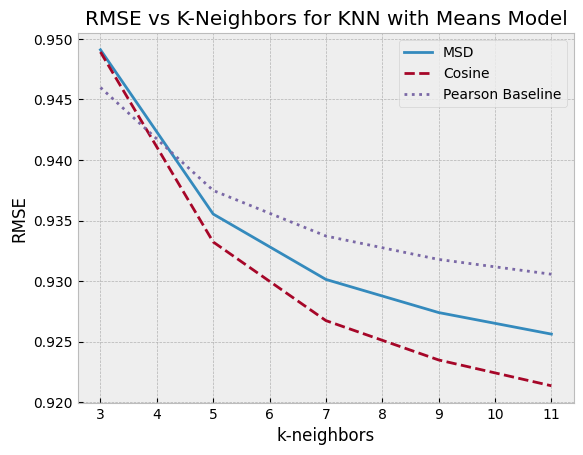

In [28]:
plt.plot(k_neighbors, dict_scores_means['MSD_rmse'], label = 'MSD')
plt.plot(k_neighbors, dict_scores_means['cosine_rmse'], label = 'Cosine', linestyle = 'dashed')
plt.plot(k_neighbors, dict_scores_means['pearson_baseline_rmse'], label = 'Pearson Baseline', linestyle='dotted')
plt.xlabel('k-neighbors')
plt.ylabel('RMSE')
plt.title('RMSE vs K-Neighbors for KNN with Means Model')
plt.legend()
plt.savefig('rmse_k knnmeans.png')
plt.show()

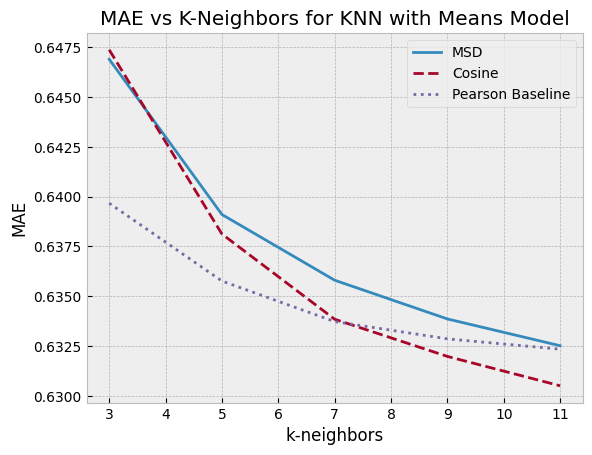

In [29]:
plt.plot(k_neighbors, dict_scores_means['MSD_mae'], label = 'MSD')
plt.plot(k_neighbors, dict_scores_means['cosine_mae'], label = 'Cosine', linestyle = 'dashed')
plt.plot(k_neighbors, dict_scores_means['pearson_baseline_mae'], label = 'Pearson Baseline', linestyle='dotted')
plt.xlabel('k-neighbors')
plt.ylabel('MAE')
plt.title('MAE vs K-Neighbors for KNN with Means Model')
plt.legend()
plt.savefig('mae_k knnmeans.png')
plt.show()